# Project Topic:  Why do customers churn a Telecommunication's Provider?

The aim of any business enterprise is to maximize profits through the provision of quality goods and services. Profit maximization is very essential for a business to fufill its various obligations in the society. For instance, businesses provides employment opportunities to the people, pays taxes to the government which are used to provide amenities, and other responsibilities to the wider society. However, this objective can be threatened if customers keep churning the business. The major objective of this project is to examine a telecommunication's company's data and try to infer why customers churn the business. The dataset is obtained from Kaggle and has so many features of the customers. Churn in this dataset is a dichotomous variable which is denoted as "Yes" or "No", hence, I will utilize a classifier model (Logistic, SVC, Random Forest Classifier) to analyze the data.

In [2]:
# Import the necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the dataset

df = pd.read_csv("/content/drive/MyDrive/DSC 550/Teleco.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Remove Customer ID column

df = df.drop('customerID',axis=1)

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Check for the attributes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Total charges is imported as object instead of float, senior citizen is imported as int which I feel shouldnt be

In [8]:
# Convert 'Total charges' to numeric data

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [9]:
# Check for missing values

df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# Find the proportion of missing data points

df.isnull().mean()

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

In [11]:
# Less than 1% was missing, the missing rows can be deleted

df = df.dropna(axis=0,subset=['TotalCharges'])

In [12]:
#check for missing values

df.isnull().mean()

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

**Plot Graphs to show relationship between churn and some customer Attributes**

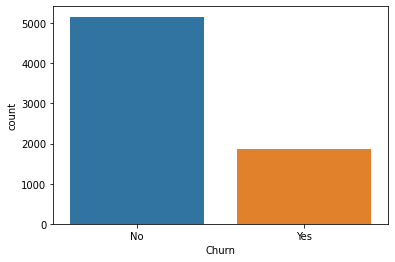

In [13]:
# Compare those who churn vs those who did not churn

sns.countplot(x='Churn',data=df)

In [14]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

The ratio of churn to not-churn is 36%, that means a about 1/3 of the customers are churning.  If this ratio can be cut down, it will make a good business sense.

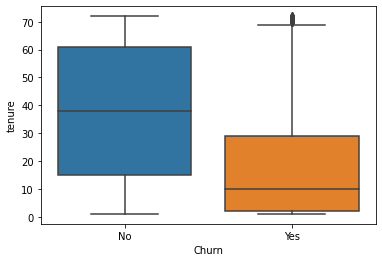

In [15]:
#  Tenure of customers and churn

sns.boxplot(x='Churn',y='tenure',data=df)

Most of the customers that churn have lower tenure compared to those that did not churn

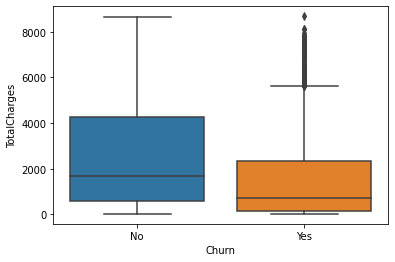

In [16]:
# Total Charges versus churn

sns.boxplot(x='Churn',y='TotalCharges',data=df)

Total charges paid by those who did not churn are higher than those that churn

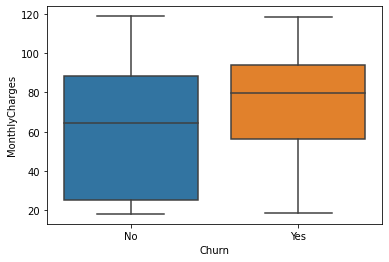

In [17]:
# Monthly charges and Churn

sns.boxplot(x='Churn',y='MonthlyCharges',data=df)

The monthly charges paid by those who churn are much higher than those who did not churn

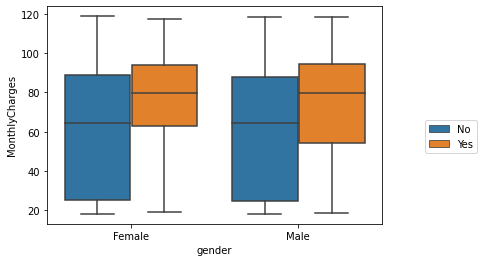

In [18]:
# Gender and Churn

sns.boxplot(x='gender',y='MonthlyCharges',data=df,hue='Churn')
plt.legend(bbox_to_anchor=(1.30,0.5))

There seems to be very little difference in churning between male and female customers.  In a sense, gender migh not be an issue in churning.

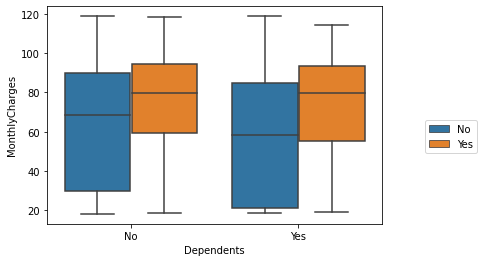

In [19]:
# Dependents versus churning

sns.boxplot(x='Dependents',y='MonthlyCharges',data=df,hue='Churn')
plt.legend(bbox_to_anchor=(1.30,0.5))

Dependents also does not really exercise much influence on churning as the distribution between those with and without dependents looks similar.

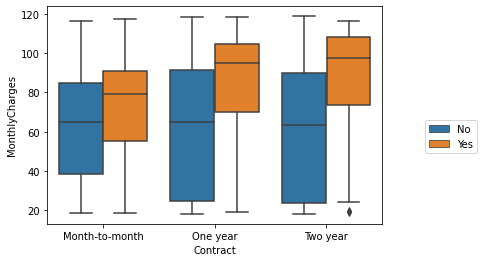

In [20]:
# Contract versus churn

sns.boxplot(x='Contract',y='MonthlyCharges',data=df,hue='Churn')
plt.legend(bbox_to_anchor=(1.30,0.5))

Churning seems to be higher among those with 1 or 2 year contract than those with Month-to-month contract.

In [21]:
# Take a look at the features again

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Dropping features that are not so useful in the modelling.**

We shall conduct some visual inspection of some of the variables and see how they relate with the target

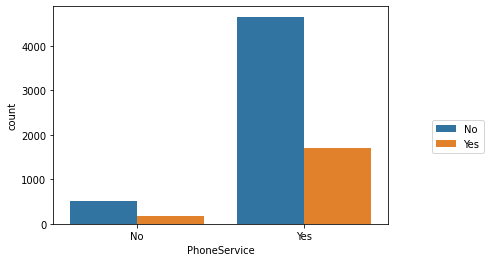

In [22]:
# Check for Phone service and Churn

sns.countplot(x='PhoneService',hue='Churn',data = df)
plt.legend(bbox_to_anchor=(1.30,0.5))

There seem to be some much variation in phone service and churn, so it a variable to watch out for

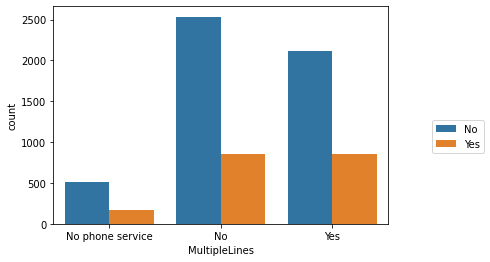

In [23]:
# Multiple Lines
sns.countplot(x='MultipleLines',hue='Churn',data = df)
plt.legend(bbox_to_anchor=(1.30,0.5))

The number of those that churn among those with and without multiple lines looks the same, while those with no phone service is lower although it is high compared to the number of those with no phone service.  We can retain this variable

### Transform the target variable from Yes = 1 and No = 0

In [24]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

In [25]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Creating Dummy Variables from the features

In [27]:
data = pd.get_dummies(df,drop_first=True)

In [28]:
data.shape

(7032, 31)

In [29]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


### Check for correlation of the features with the target variable to determine initial feature selection

In [30]:
abs(data.corr()['Churn']).sort_values(ascending=False)

Churn                                    1.000000
tenure                                   0.354049
InternetService_Fiber optic              0.307463
Contract_Two year                        0.301552
PaymentMethod_Electronic check           0.301455
OnlineBackup_No internet service         0.227578
DeviceProtection_No internet service     0.227578
TechSupport_No internet service          0.227578
StreamingMovies_No internet service      0.227578
InternetService_No                       0.227578
OnlineSecurity_No internet service       0.227578
StreamingTV_No internet service          0.227578
TotalCharges                             0.199484
MonthlyCharges                           0.192858
PaperlessBilling_Yes                     0.191454
Contract_One year                        0.178225
OnlineSecurity_Yes                       0.171270
TechSupport_Yes                          0.164716
Dependents_Yes                           0.163128
SeniorCitizen                            0.150541


### Examine the monthly charges vis-a-vis Total charges using scatter plot



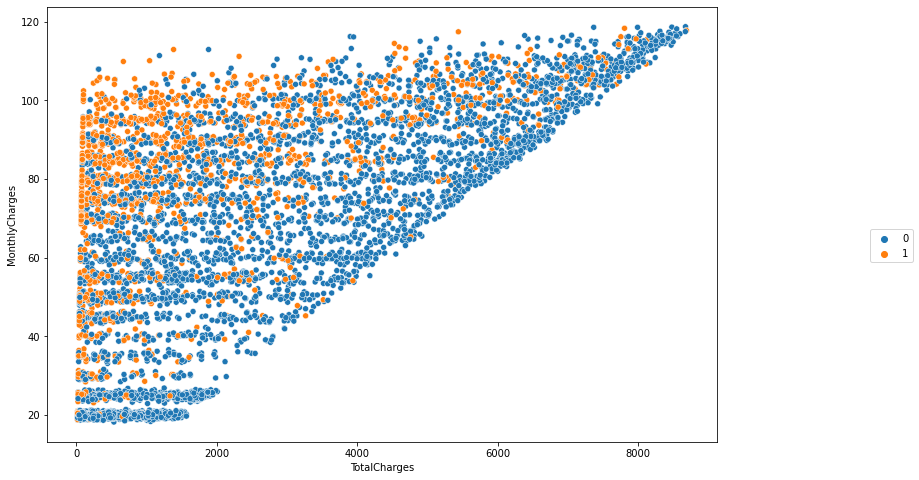

In [31]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='TotalCharges',y='MonthlyCharges', hue='Churn', data=data)
plt.legend(bbox_to_anchor=(1.30,0.5))

Most of the people that churn are clustered around high Montly charges, although they seem to be scacctered all over the places.  This has some implications on model selection for classifying the classes accurately.

**Which feature to drop?**

From our analysis so far, it seems the socio-demographics does not have any meaningful explanation for the decison to Churn.  On the basis of this, I can go ahead and drop 'gender' and 'dependents'.

In [32]:
data = data.drop(['gender_Male','Dependents_Yes'],axis=1)

In [33]:
data.shape

(7032, 29)

# MODEL BUILDING AND EVALUATION

Our objective is to build a model that explains why customers churn.  This is a binary choice model and we need a classifier algorith to implement the project.  Possible algorithms include, Logistic Regression, K-NearestNeighbor, Support Vector Classifier, Random Forest Classifier.  

The metrics that will be used include accuracy, recall and precision.  If the data posses a balance class variable, accuracy will be sufficient, if not, we will need to examine recall and precision.

In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [35]:
# Check the distribution of the class

df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

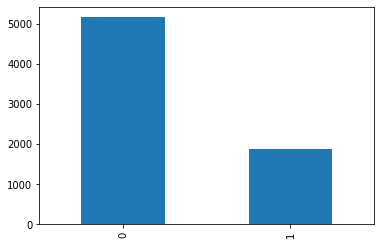

In [36]:
df['Churn'].value_counts().plot(kind="bar")

The distribution of churn versus not churn is about 2.5:1 which is not too bad.

In [37]:
# Convert the data to numeric values

data = pd.get_dummies(df,drop_first=True)

In [38]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


Rename some columns

In [39]:
data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [40]:
data = data.rename(columns={"PhoneService_Yes":"PhoneService","MultipleLines_No phone service":"NonMult_PhoneService","MultipleLines_Yes":"MultipleLines",
                            "InternetService_Fiber optic":"Int_FibreOptic","InternetService_No":"InternetService","OnlineSecurity_No internet service":"NoOnlineSecurity",
                            "OnlineSecurity_Yes":"OnlineSeurity","OnlineBackup_No internet service":"NoOnlineIntBackup","OnlineBackup_Yes":"OnlineBackup",
                            "DeviceProtection_No internet service":"NoDeviceProtection","DeviceProtection_Yes":"DeviceProtection","TechSupport_No internet service":"NoTechSupport",
                            "TechSupport_Yes":"TechSupport","StreamingTV_No internet service":"NoStreamTV","StreamingTV_Yes":"StreamTV","StreamingMovies_No internet service":"NoStreamMovie",
                            "StreamingMovies_Yes":"StreamingMovies","Contract_One year":"OneYrContract","Contract_Two year":"TwoYrContract","PaperlessBilling_Yes":"PaperLessBilling",
                            "PaymentMethod_Credit card (automatic)":"CreditCardPayment","PaymentMethod_Electronic check":"ElectCheckPayment","PaymentMethod_Mailed check":"MailedChkPayment"})

In [41]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService,NonMult_PhoneService,MultipleLines,Int_FibreOptic,InternetService,NoOnlineSecurity,OnlineSeurity,NoOnlineIntBackup,OnlineBackup,NoDeviceProtection,DeviceProtection,NoTechSupport,TechSupport,NoStreamTV,StreamTV,NoStreamMovie,StreamingMovies,OneYrContract,TwoYrContract,PaperLessBilling,CreditCardPayment,ElectCheckPayment,MailedChkPayment
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


**Split the data into train and test set**

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Partition the dataframe into X and y

X = data.drop('Churn',axis=1)
y = data['Churn']

In [44]:
X.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService,NonMult_PhoneService,MultipleLines,Int_FibreOptic,InternetService,NoOnlineSecurity,OnlineSeurity,NoOnlineIntBackup,OnlineBackup,NoDeviceProtection,DeviceProtection,NoTechSupport,TechSupport,NoStreamTV,StreamTV,NoStreamMovie,StreamingMovies,OneYrContract,TwoYrContract,PaperLessBilling,CreditCardPayment,ElectCheckPayment,MailedChkPayment
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [45]:
# Get X_train, X_test, y_train and y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Set up a pipeline with preprocessing step and future selection**

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_classif

In [51]:
# Create a pipeline

pipe = Pipeline([('scaler',StandardScaler()),
                 ('classifier',LogisticRegression())])

In [52]:
# Create a search space

search_space = [{'classifier':[LogisticRegression()],
                 'classifier__penalty':['l1','l2'],
                 'classifier__C':np.logspace(0,4,10)},
                {'classifier':[KNeighborsClassifier()],
                'classifier__n_neighbors':[3,5,8,11],
                 'classifier__weights':['uniform','distance']},
                {'classifier':[RandomForestClassifier()],
                 'classifier__n_estimators':[10,100,1000],
                 'classifier__max_features':[1,2,3]}]

In [53]:
# Run the gridsearch

model = GridSearchCV(pipe,search_space,cv=10,verbose=0)
model.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 370.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             param_grid=[{'classifier': [LogisticRegression(C=7.742636826811269)],
                          'classifier__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l1', 'l2']},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [3, 5, 8, 11],
                          'classifier__weights': ['uniform', 'distance']},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_features': [1, 2, 3],
                          'classifier__n_estimators': [10, 100, 1000]}])

In [54]:
model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=7.742636826811269))])

In [55]:
model.best_score_

0.8048039544130011

In [57]:
y_pred = model.predict(X_test)

In [58]:
# Evaluating Performance

model.score(X_test,y_test)

0.7889125799573561

By approximation, the model provided accuracy score of 80% on both the trainig and test sets.

**Evaluation with ROC curves and classification matrix**

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix,plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


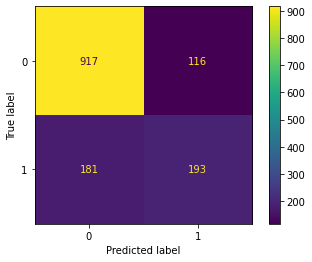

In [60]:
plot_confusion_matrix(model,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


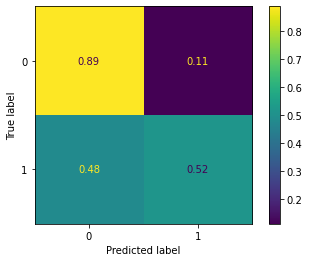

In [62]:
plot_confusion_matrix(model,X_test,y_test,normalize='true')

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


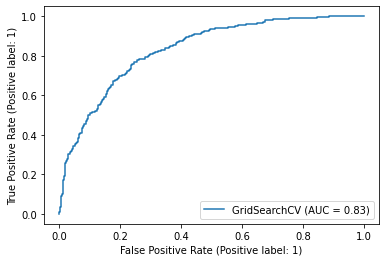

In [64]:
plot_roc_curve(model,X_test,y_test)

The result shows that model performs well at identifying those that did not churn, but performs poorly on those that churn.  This may not be unconnected with the fact that the number of people that churn were much less than those that did not churn.

### The model was not able to predict well those that churn.  This is probably due to the size of class imbalance.  We take this up in part 2